<a href="https://colab.research.google.com/github/dkssk2140/Test-notebook/blob/master/5%EC%9E%A5_%ED%9A%8C%EA%B7%80_09_%EC%8B%A4%EC%8A%B5(datetime%20%ED%99%9C%EC%9A%A9%20%EC%BD%94%EB%93%9C)_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1_20201013_14_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 캐글 자전거 대여 데이터 예측  p.342~
- 데이터 전처리 
    - 데이터 클렌징 및 가공
    - 로그 변환, 피처 인코딩(숫자로 변환)
- 모델 학습/ 예측/ 평가

In [ ]:
# 데이터 전처리
## 데이터 클렌징 및 가공

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [ ]:
# 데이터 로딩 => 데이터프레임으로
bike_df = pd.read_csv('./data/bike/train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.shape

(10886, 12)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# datetime column 데이터 타입 변경
# object => datatime   : to_datetimme function 사용 (datetime 함수의 기능을 사용할 수 있다.)
# 문자열 가공: 문자열 함수 사용
# datetime : 함수 사용 가능

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# 년, 월, 일, 시간 추출 => 새로운 컬럼 생성
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month']= bike_df.datetime.apply(lambda x: x.month)
bike_df['day']= bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']= bike_df.datetime.apply(lambda x: x.hour)

In [ ]:
type(bike_df.datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# 필요없는 컬럼 삭제 (클렌징):drop : datetime, casual(사전에 등록되지 않은 사용자가 대여한 횟수), registered(등록된 사용자 대여횟수)
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


### 데이터 전처리
- 로그 변환, 피처 인코딩

In [ ]:
# 데이터(X_data), 답(y_target) 분리
y_target = bike_df['count']
X_data = bike_df.drop(['count'], axis=1, inplace=False)

In [ ]:
# 학습 데이터/ 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(
    X_data, y_target, test_size = 0.3, random_state=0
)

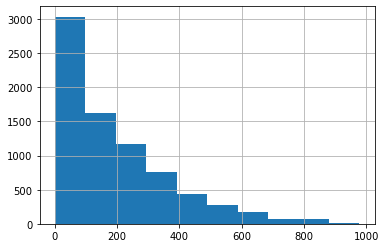

In [ ]:
# 답 분포 확인 
y_train.hist()   # 데이터 프레임에서는 바로 histogram 을 볼수 있는 function hist()가 있다.

레이블의 값들이 한쪽으로 쏠려있어서, 알고리즘 입장에서 학습이 어렵다 -> 정규분포로 변환해주기

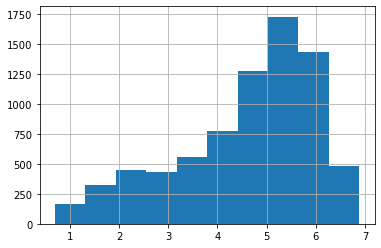

In [ ]:
# 데이터 불균형이 심한 데이터셋에서는 로그변환이 효과적이다.
y_log_transform = np.log1p(y_train)
y_log_transform.hist()

### 본 캐글에서 요구한 성능평가 방법 : RMSLE
- Root Mean Squared Logarithmic Error (RMSLE) 

$\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$

In [ ]:
# log 값 변환시 Nan 등의 이슈로 log() -> log1p()사용
# 사이킷런에서 RMSLE 지원 안하므로 따로 function 만들어주기
# root(log(원래값)- log(예측값))**2

def rmsle(y, pred):  # 원래값:y, 예측값:pred 로 파라미터 지정
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [ ]:
# RMSE 함수 만들기
def rmse(y, pred):
#     squared_error = (y-pred)**2
#     rmse = np.sqrt(np.mean(squared_error))
    rmse= np.sqrt(mean_squared_error(y,pred))
    return rmse

# 위코드를 대신하는 사이킷런의 메소드가 있다.
from sklearn.metrics import mean_squared_error

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

# 오차함수 값들 RMSE, MAE, RMSLE 모두 계산 / 출력하는 함수 생성하기
def eval_regr(y, pred):
    rmsle_val = rmsle(y, pred) # RMSLE
    rmse_val = rmse(y, pred)  # RMSE
    mae_val = mean_absolute_error(y, pred)  # MAE
    
    out_str = 'RMSLE :{0:.3f}, RMSE : {1:.3f}, MAE:{2:.3f}'
    print(out_str.format(rmsle_val, rmse_val, mae_val))

위에서 만든 함수들 이용해서 실습에 적용하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
# 데이터 답 분리
y_target = bike_df['count'] # label
X_features = bike_df.drop('count', axis=1, inplace=False)  # data

# 학습데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.3, random_state = 0
)

# 학습 후 예측값 출력
# 선형회귀 모델 생성
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
eval_regr(y_test, pred)

RMSLE :1.165, RMSE : 140.900, MAE:105.924


위의 오차 수준들이 타겟값 스케일에 비하여 너무 크다. -> 개선필요
- 접근 1. 타겟값 정규화 하기(log 변환)

In [ ]:
# 오차값(원래값-예측값)이 큰 5개 데이터 출력
def get_top_error_data(y_test, pred, n_tops=5):   # 출력할 상위 데이터 개수 디폴트 5 처리
    # 원래값, 예측값을 데이터 프레임으로 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] =  np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    result_df_sort = result_df.sort_values(by='diff', ascending=False)
    return result_df_sort[:n_tops]

In [ ]:
get_top_error_data(y_test, pred)

,real_count,predicted_count,diff
1618,890,322.0,568.0
3151,798,241.0,557.0
966,884,327.0,557.0
412,745,194.0,551.0
2817,856,310.0,546.0


In [ ]:
# 타겟 컬럼인 count 값을 log1p()로 변환-> 정규분포에 가깝도록
y_target_log=np.log1p(y_target)
# 변환된 값으로 학습/테스트 데이터 분리
X_train,X_test, y_train,y_test = train_test_split(
X_features, y_target_log, test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)  # 로그처리가 되어있는 예측값 
# 오차값을 원래 스케일로 돌리기
# 1. pred, 2.y_test
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

eval_regr(y_test_exp, pred_exp)


RMSLE :1.017, RMSE : 162.594, MAE:109.286


- 로그 변환을 이용해 정규분포에 가까운 타겟값을 이용해 모델을 생성했음, RMSLE는 개선됨 .
- 그러나,RMSE, MAE 오차값은 더 안좋아졌고, 그 오차 수준이 너무 크다.-> 모델에 여전히 문제가 있으니 개선 필요

- 접근2. 데이터 인코딩(원핫인코딩)

In [ ]:
# One-Hot : 범주형 데이터 값을 => 0, 1로 변환
# pd.get_dummies()이용
# 데이터가 숫자로 되어있어 그 결과값을 왜곡영향을 줄수 있는 데이터들을 원핫인코딩하기:
## 'year', 'month', 'hour', 'season', 'weather', 'holiday', 'workingday'
X_feature_ohe = pd.get_dummies(
      X_features   # 전체 데이터 프레임
    , columns=['year', 'month', 'hour', 'season', 'weather', 'holiday', 'workingday']
)
X_feature_ohe.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,holiday_0,holiday_1,workingday_0,workingday_1
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
X_feature_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 55 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   day           10886 non-null  int64  
 5   year_2011     10886 non-null  uint8  
 6   year_2012     10886 non-null  uint8  
 7   month_1       10886 non-null  uint8  
 8   month_2       10886 non-null  uint8  
 9   month_3       10886 non-null  uint8  
 10  month_4       10886 non-null  uint8  
 11  month_5       10886 non-null  uint8  
 12  month_6       10886 non-null  uint8  
 13  month_7       10886 non-null  uint8  
 14  month_8       10886 non-null  uint8  
 15  month_9       10886 non-null  uint8  
 16  month_10      10886 non-null  uint8  
 17  month_11      10886 non-null  uint8  
 18  month_12      10886 non-nu

In [ ]:
import pandas as pd

In [ ]:
pd.get_dummies?

- 원핫 인코딩이 되어서 컬럼 수가 55개로 늘어났다.

In [ ]:
# 원핫인코딩 된 데이터로 다시 학습하기

# 데이터 분리
X_train, X_test, y_train, y_test= train_test_split(
    X_feature_ohe, y_target_log, test_size=0.3, random_state=0
)

# 선형회귀 모델 생성/학습/성능평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
eval_regr(y_test_exp,pred_exp )

RMSLE :0.589, RMSE : 97.483, MAE:63.106


오차가 많이 줄었지만, 여전히 높다. 다른 알고리즘 적용해보기

In [ ]:
# 여러개 알고리즘 적용 (Linear Regression, Ridge, Lasso) 함수
# 오차값 pred 반환 : eval_regr()
def get_model_predict(model, X_train, X_test, y_train, y_test,is_expm1=False): #로그처리 => 원래 값으로 돌린다.     
    # 학습 / 예측값
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred= np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    eval_regr(y_test, pred)

In [ ]:
# model 별로 평가 수행
lr_reg= LinearRegression()
ridge_reg= Ridge(alpha=10)
rasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, rasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE :0.589, RMSE : 97.483, MAE:63.106
### Ridge ###
RMSLE :0.589, RMSE : 98.407, MAE:63.648
### Lasso ###
RMSLE :0.634, RMSE : 113.031, MAE:72.658


여전히 오차가 높다

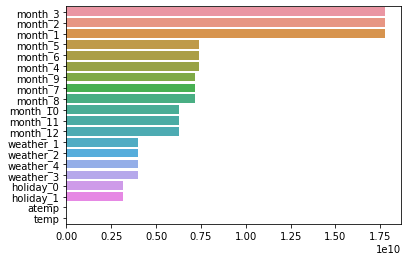

In [ ]:
# 계수값 확인
coef = pd.Series(lr_reg.coef_, index= X_feature_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(coef_sort.values, coef_sort.index)

import warnings
warnings.filterwarnings('ignore')

월별 인자가 가장 영향이 크고, 그다음에 날씨, 그다음에 휴일여부

In [ ]:
# 앙상블 회귀 트리 사용
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor   # 사이킷런 래퍼클래스
from lightgbm import LGBMRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### RandomForestRegressor ###
RMSLE :0.353, RMSE : 50.707, MAE:31.403
### GradientBoostingRegressor ###
RMSLE :0.340, RMSE : 55.736, MAE:34.315
[12:31:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE :0.346, RMSE : 56.474, MAE:34.917
### LGBMRegressor ###
RMSLE :0.316, RMSE : 46.473, MAE:28.777


LGBM 모델이 가장 오차가 적음을 확인할수있다

### 캐글 데이터셋의 test 데이터를 사용해 count 예측하기
- 여기의 test 데이터는 count컬럼, 즉 답이 없다.
- 캐글에 제출하면 점수를 알수 있다.

In [ ]:
test_file = pd.read_csv('./data/bike/test.csv')

In [ ]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
test_df = pd.read_csv('./data/bike/test.csv')

test_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

test_df['year'] = bike_df.datetime.apply(lambda x: x.year)
test_df['month']= bike_df.datetime.apply(lambda x: x.month)
test_df['day']= bike_df.datetime.apply(lambda x: x.day)
test_df['hour']= bike_df.datetime.apply(lambda x: x.hour)

drop_columns = ['datetime']
test_df.drop(drop_columns, axis=1, inplace=True)